# BPM Prediction Modeling

This notebook focuses on building and evaluating machine learning models for predicting the Beats Per Minute (BPM) of songs using the engineered features created in the exploratory data analysis (EDA) notebook.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [3]:
# Load the training and test datasets
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv', comment='#')

# Standardize column names to match the expected format
# Map test columns to train column format
test_column_mapping = {
    'AudioLoudness': 'audio_loudness',
    'VocalContent': 'vocal_content', 
    'AcousticQuality': 'acoustic_quality',
    'InstrumentalScore': 'instrumental_score',
    'LivePerformanceLikelihood': 'live_performance_likelihood',
    'MoodScore': 'mood_score',
    'Energy': 'energy',
    'RhythmScore': 'rhythm_score',
    'TrackDurationMs': 'track_duration_ms'
}

# Rename test columns to match train format
test_df = test_df.rename(columns=test_column_mapping)

# Display the first few rows of the training dataset
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("\nTraining data columns:")
print(train_df.columns.tolist())
print("\nTest data columns:")
print(test_df.columns.tolist())
train_df.head()

Training data shape: (10, 14)
Test data shape: (10, 10)

Training data columns:
['id', 'title', 'artist', 'album', 'track_duration_ms', 'audio_loudness', 'energy', 'rhythm_score', 'vocal_content', 'instrumental_score', 'acoustic_quality', 'mood_score', 'live_performance_likelihood', 'beats_per_minute']

Test data columns:
['id', 'audio_loudness', 'vocal_content', 'acoustic_quality', 'instrumental_score', 'live_performance_likelihood', 'mood_score', 'energy', 'rhythm_score', 'track_duration_ms']


,id,title,artist,album,track_duration_ms,audio_loudness,energy,rhythm_score,vocal_content,instrumental_score,acoustic_quality,mood_score,live_performance_likelihood,beats_per_minute
0,1,Song A,Artist 1,Album 1,240000,-8.5,0.70,0.60,0.10,0.20,0.50,0.60,0.30,120.0
1,2,Song B,Artist 2,Album 2,180000,-6.0,0.80,0.70,0.20,0.10,0.40,0.50,0.40,130.0
2,3,Song C,Artist 3,Album 3,300000,-10.0,0.50,0.50,0.05,0.30,0.60,0.70,0.20,110.0
3,4,Song D,Artist 4,Album 4,210000,-7.5,0.60,0.40,0.15,0.25,0.30,0.40,0.50,115.0
4,5,Song E,Artist 5,Album 5,240000,-9.0,0.65,0.55,0.10,0.15,0.45,0.55,0.35,125.0


In [ ]:
# Feature engineering (assuming features have been engineered in the EDA notebook)
# Here you would typically call your feature engineering functions from src/feature_engineering.py
# For example:
# from src.feature_engineering import engineer_features
# train_fe = engineer_features(train_df)
# test_fe = engineer_features(test_df)


In [4]:
# Split the training data into features and target variable
# Exclude non-feature columns
non_feature_cols = ['id', 'title', 'artist', 'album', 'beats_per_minute']
feature_cols = [col for col in train_df.columns if col not in non_feature_cols]

X = train_df[feature_cols]
y = train_df['beats_per_minute']

print("Feature columns:", feature_cols)
print("X shape:", X.shape)
print("y shape:", y.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Feature columns: ['track_duration_ms', 'audio_loudness', 'energy', 'rhythm_score', 'vocal_content', 'instrumental_score', 'acoustic_quality', 'mood_score', 'live_performance_likelihood']
X shape: (10, 9)
y shape: (10,)
Training set shape: (8, 9)
Validation set shape: (2, 9)


In [5]:
# Train a Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Validate the model
y_val_pred = lasso_model.predict(X_val)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

# Display the results
print(f'Validation RMSE: {rmse:.2f}')
print(f'Validation R²: {r2:.2f}')

Validation RMSE: 8.92
Validation R²: 0.20


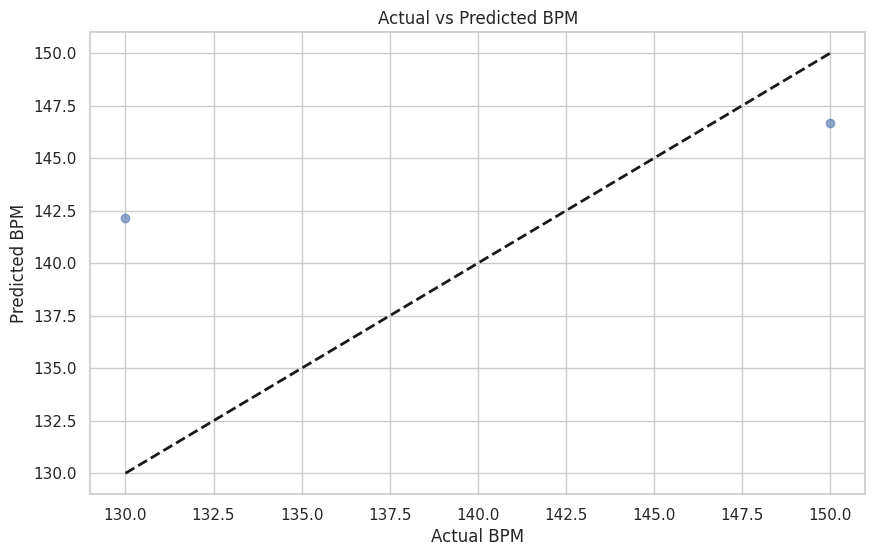

In [6]:
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual BPM')
plt.ylabel('Predicted BPM')
plt.title('Actual vs Predicted BPM')
plt.show()

In [7]:
# Make predictions on the test set
# Use the same feature columns as training
test_features = test_df[feature_cols]
print("Test features shape:", test_features.shape)

# Make predictions
y_test_pred = lasso_model.predict(test_features)

# Save predictions to submission file
submission = pd.DataFrame({
    'id': test_df['id'], 
    'BeatsPerMinute': y_test_pred
})

print("Predictions:")
print(submission)

# Save to file
submission.to_csv('../data/submission.csv', index=False)
print("\nSubmission file saved to ../data/submission.csv")

Test features shape: (10, 9)
Predictions:
       id  BeatsPerMinute
0  524165      128.972145
1  524166      136.316963
2  524167      118.481419
3  524168      142.311039
4  524169      139.917968
5  524170      135.656019
6  524171      125.494794
7  524172      132.839612
8  524173      130.083337
9  524174      135.627165

Submission file saved to ../data/submission.csv
